In [27]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

In [28]:
plt.style.use('ggplot')

# Scenario

In this assignment you will be tasked with creating plots which answer questions for analysing "historical_automobile_sales" data to understand the historical trends in automobile sales during recession periods.<br>
recession period 1 - year 1980 <br>
recession period 2 - year 1981 to 1982<br>
recession period 3 - year 1991<br>
recession period 4 - year 2000 to 2001<br>
recession period 5 - year end 2007 to mid 2009<br>
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>

# Data Description

The dataset used for this visualization assignment contains *historical_automobile_sales* data representing automobile sales and related variables during recession and non-recession period. 

The dataset includes the following variables:
<br>1. Date: The date of the observation.
<br>2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
<br>3. Automobile_Sales: The number of vehicles sold during the period.
<br>4. GDP: The per capita GDP value in USD.
<br>5. Unemployment_Rate: The monthly unemployment rate.
<br>6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
<br>7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
<br>8. Price: The average vehicle price during the period.
<br>9. Advertising_Expenditure: The advertising expenditure of the company.
<br>10.Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar,                 Mediumfamilycar, Executivecar, Sports.
<br>11.Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
<br>12.Month: Month of the observation extracted from Date..
<br>13.Year: Year of the observation extracted from Date.
<br>
By examining various factors mentioned above from the dataset, you aim to gain insights into how recessions impacted automobile sales for your company.

# Importing the data

In [29]:
#!curl -o historical_automobile_sales.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv

In [30]:
df = pd.read_csv('historical_automobile_sales.csv')
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [31]:
df.shape

(528, 15)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     528 non-null    object 
 1   Year                     528 non-null    int64  
 2   Month                    528 non-null    object 
 3   Recession                528 non-null    int64  
 4   Consumer_Confidence      528 non-null    float64
 5   Seasonality_Weight       528 non-null    float64
 6   Price                    528 non-null    float64
 7   Advertising_Expenditure  528 non-null    int64  
 8   Competition              528 non-null    int64  
 9   GDP                      528 non-null    float64
 10  Growth_Rate              528 non-null    float64
 11  unemployment_rate        528 non-null    float64
 12  Automobile_Sales         528 non-null    float64
 13  Vehicle_Type             528 non-null    object 
 14  City                     5

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,528.0,2001.500000,12.710467,1980.000000,1990.750000,2001.500000,2012.250000,2023.000000
Recession,528.0,0.214015,0.410526,0.000000,0.000000,0.000000,0.000000,1.000000
Consumer_Confidence,528.0,101.140170,10.601154,73.900000,94.035000,100.740000,108.240000,131.670000
Seasonality_Weight,528.0,0.575795,0.454477,0.000000,0.250000,0.500000,0.750000,1.500000
Price,528.0,24964.991956,4888.073433,8793.663000,21453.300500,25038.691500,28131.684750,44263.657000
Advertising_Expenditure,528.0,3067.456439,1139.564637,1009.000000,2083.500000,3072.000000,4067.250000,4983.000000
Competition,528.0,6.064394,1.968350,3.000000,4.000000,6.000000,8.000000,9.000000
GDP,528.0,40.073903,16.249714,12.508000,27.237500,39.214500,53.506500,70.374000
Growth_Rate,528.0,-0.242001,0.861268,-4.227601,-0.574049,-0.013162,0.388932,0.815074
unemployment_rate,528.0,2.453977,1.119019,1.000000,1.600000,2.300000,2.900000,6.000000


In [34]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

# Creating Visualizations for Data Analysis

### TASK 1.1: Develop a *Line chart* using the functionality of pandas to show how automobile sales fluctuate from year to year

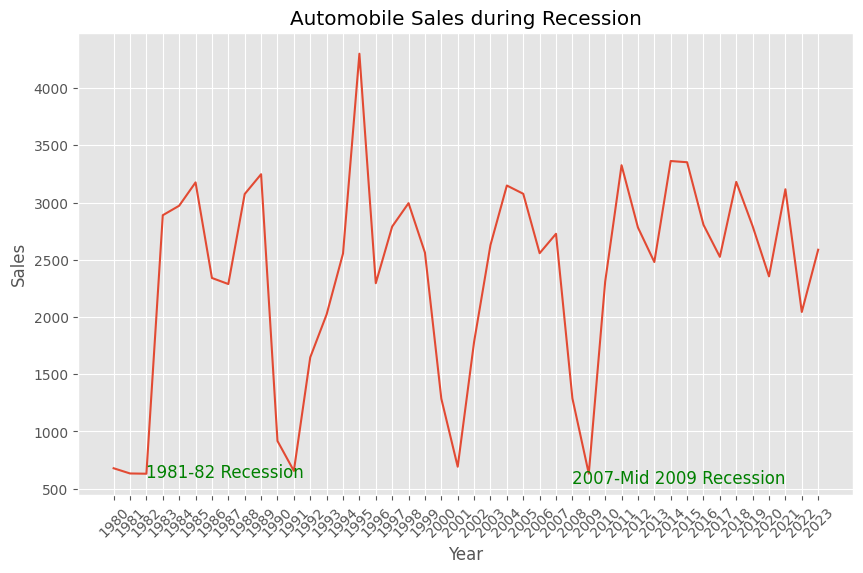

In [35]:
plt.figure(figsize=(10, 6))
df.groupby("Year")["Automobile_Sales"].mean().plot()
plt.title("Automobile Sales during Recession")
plt.ylabel("Sales")
plt.xticks(df["Year"].unique(), rotation=45)
plt.text(1982, 600, "1981-82 Recession", fontsize=12, color="green")
plt.text(2008, 550, "2007-Mid 2009 Recession", fontsize=12, color="green")
plt.show()

####  TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?

In [36]:
df["Vehicle_Type"].value_counts()

Vehicle_Type
Mediumfamilycar    166
Smallfamiliycar    122
Sports              94
Supperminicar       76
Executivecar        70
Name: count, dtype: int64

In [37]:
df_rec = df[df["Recession"] == 1]
df_rec.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [38]:
df_veh_year = df_rec.groupby(["Year", "Vehicle_Type"], as_index=False)["Automobile_Sales"].mean()
df_veh_year.head()

,Year,Vehicle_Type,Automobile_Sales
0,1980,Mediumfamilycar,720.625000
1,1980,Smallfamiliycar,695.233333
2,1980,Supperminicar,635.840000
3,1981,Mediumfamilycar,628.400000
4,1981,Smallfamiliycar,638.420000


In [39]:
df_veh_year["Normilized_Sales"] = df_veh_year.groupby("Vehicle_Type")["Automobile_Sales"].transform(lambda x: x / x.mean())
df_veh_year.set_index("Year", inplace=True)
df_veh_year.head()

,Vehicle_Type,Automobile_Sales,Normilized_Sales
Year,,,
1980,Mediumfamilycar,720.625000,1.074659
1980,Smallfamiliycar,695.233333,1.049896
1980,Supperminicar,635.840000,0.947466
1981,Mediumfamilycar,628.400000,0.937125
1981,Smallfamiliycar,638.420000,0.964100


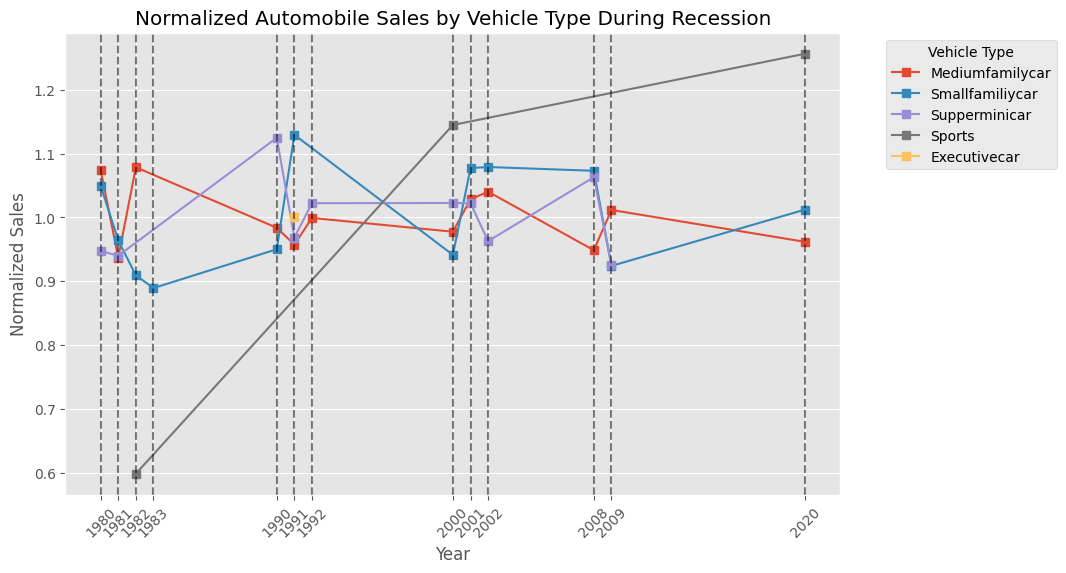

In [40]:
vehicule_types = df_veh_year["Vehicle_Type"].unique()
plt.figure(figsize=(10, 6))

for vehicule in vehicule_types:
    df_veh_year[df_veh_year["Vehicle_Type"] == vehicule]["Normilized_Sales"].plot(label=vehicule, marker="s")


recession_years = df_rec['Year'].unique()
for year in recession_years:
    plt.axvline(x=year, color='black', linestyle='--', alpha=0.5)

plt.legend(title="Vehicle Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Normalized Sales")
plt.xlabel("Year")
plt.title("Normalized Automobile Sales by Vehicle Type During Recession")
plt.xticks(df_rec["Year"].unique(), rotation=45)
plt.show()


### TASK 1.3: Use the functionality of **Seaborn Library** to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.

<Figure size 1000x600 with 0 Axes>

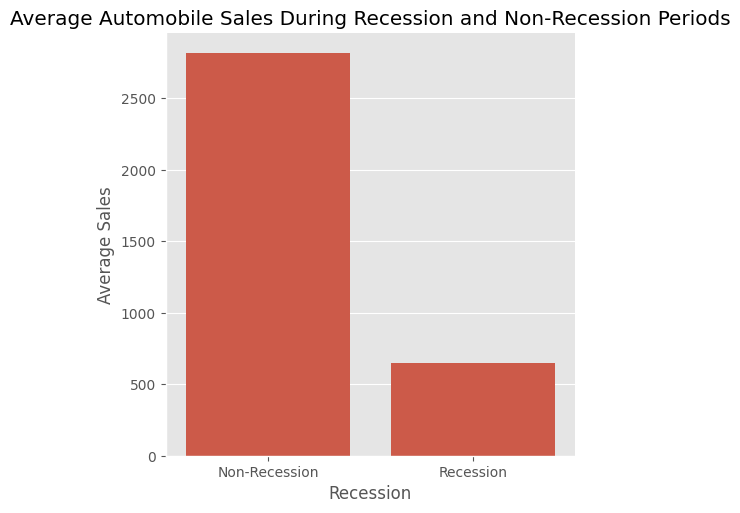

In [41]:
plt.figure(figsize=(10, 6))
d = df.groupby(["Recession"], as_index=False)["Automobile_Sales"].mean()
sns.catplot(x="Recession", y="Automobile_Sales", data=d, kind="bar")
plt.title("Average Automobile Sales During Recession and Non-Recession Periods")
plt.ylabel("Average Sales")
plt.xticks([0, 1], ["Non-Recession", "Recession"])
plt.show()

In [42]:
df_rec_vs_nonrec = df.groupby(["Recession", "Vehicle_Type"], as_index=False)["Automobile_Sales"].mean()
df_rec_vs_nonrec

,Recession,Vehicle_Type,Automobile_Sales
0,0,Executivecar,2686.436232
1,0,Mediumfamilycar,2981.501935
2,0,Smallfamiliycar,2752.658140
3,0,Sports,2910.636264
4,0,Supperminicar,2495.242222
5,1,Executivecar,564.000000
6,1,Mediumfamilycar,674.847619
7,1,Smallfamiliycar,650.733333
8,1,Sports,170.333333
9,1,Supperminicar,659.270968


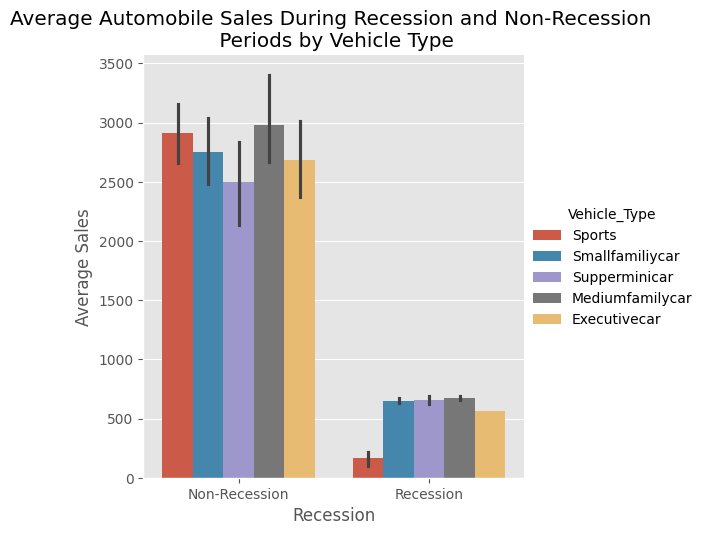

In [43]:
sns.catplot(x="Recession", y="Automobile_Sales", hue="Vehicle_Type", data=df, kind="bar")
plt.title("Average Automobile Sales During Recession and Non-Recession \n Periods by Vehicle Type")
plt.ylabel("Average Sales")
plt.xticks([0, 1], ["Non-Recession", "Recession"])
plt.show()

### TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.


In [44]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [45]:
df_rec[["Year","GDP"]]

,Year,GDP
0,1980,60.223
1,1980,45.986
2,1980,35.141
3,1980,45.673
4,1980,52.997
...,...,...
108,2009,37.003
109,2020,17.046
110,2020,53.028
111,2020,24.367


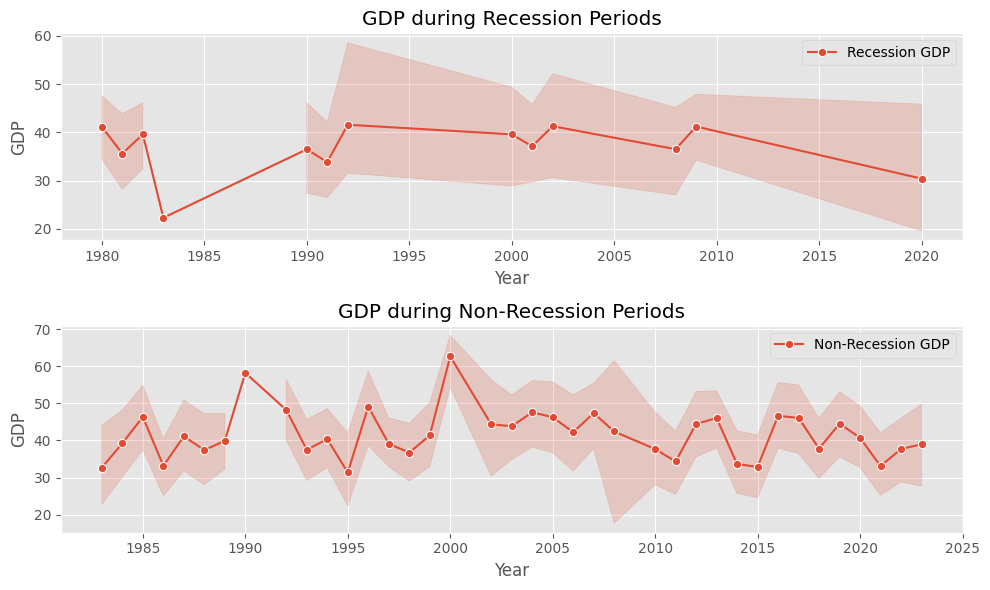

In [46]:
df_rec = df[df["Recession"] == 1]
df_non_rec = df[df["Recession"] == 0]

fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(211)
sns.lineplot(x="Year", y="GDP", data=df_rec, label="Recession GDP", marker="o", ax=ax1)
ax1.set_title("GDP during Recession Periods")
ax1.set_ylabel("GDP")
ax1.set_xlabel("Year")

ax2 = fig.add_subplot(212)

sns.lineplot(x="Year", y="GDP", data=df_non_rec, label="Non-Recession GDP", marker="o", ax=ax2)
ax2.set_title("GDP during Non-Recession Periods")
ax2.set_ylabel("GDP")
ax2.set_xlabel("Year")
plt.tight_layout()

### TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.

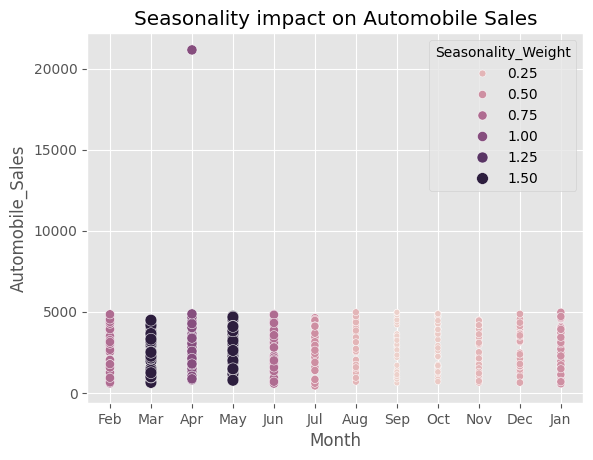

In [54]:
size=df_non_rec['Seasonality_Weight'] 
sns.scatterplot(data=df_non_rec, x='Month', y='Automobile_Sales', size=size, hue='Seasonality_Weight')
    

plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')

plt.show()

 ### TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.

Text(0.5, 1.0, 'Consumer Confidence vs Automobile Sales during Recession')

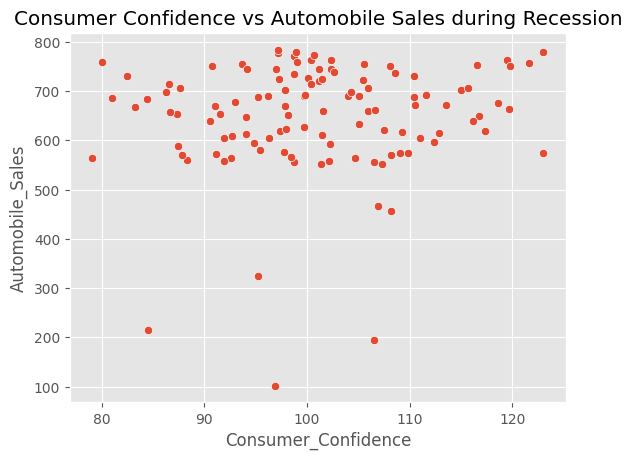

In [51]:
sns.scatterplot(data=df_rec, x="Consumer_Confidence", y="Automobile_Sales")
plt.title("Consumer Confidence vs Automobile Sales during Recession")

Text(0.5, 1.0, 'Price vs Automobile Sales during Recession')

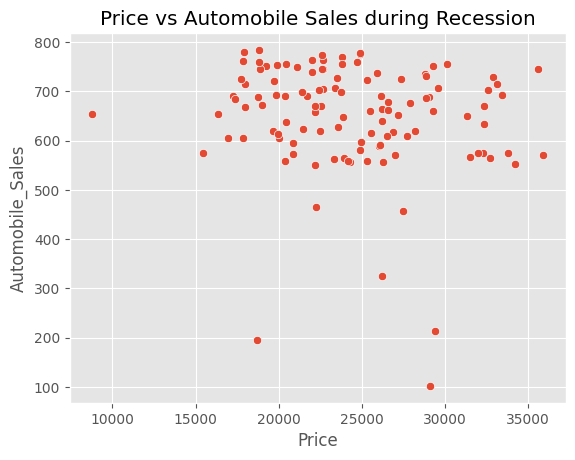

In [53]:
sns.scatterplot(data=df_rec, x="Price", y="Automobile_Sales")
plt.title("Price vs Automobile Sales during Recession")

 ### TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.

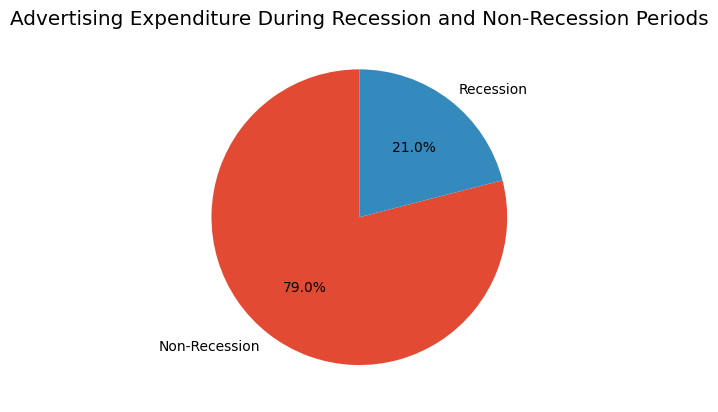

In [69]:
advertising_df = df.groupby("Recession")["Advertising_Expenditure"].sum()
plt.pie(advertising_df, labels=["Non-Recession", "Recession"], autopct='%1.1f%%', startangle=90)
plt.title("Advertising Expenditure During Recession and Non-Recession Periods")
plt.grid('equal')
plt.show()

### TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period

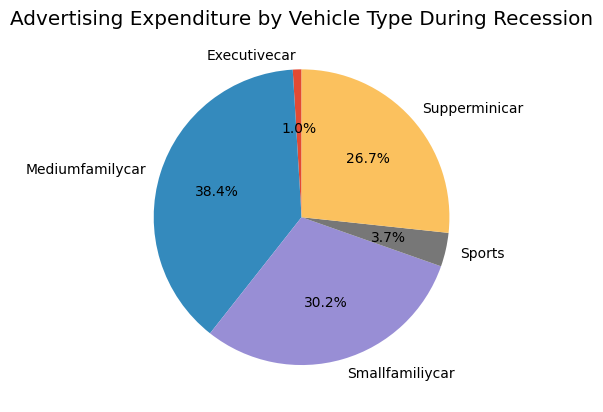

In [67]:
dd = df_rec.groupby("Vehicle_Type")["Advertising_Expenditure"].sum()
plt.pie(dd, labels=dd.index, autopct='%1.1f%%', startangle=90)
plt.title("Advertising Expenditure by Vehicle Type During Recession")
plt.grid('equal')
plt.show()

### TASK 1.9: Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.

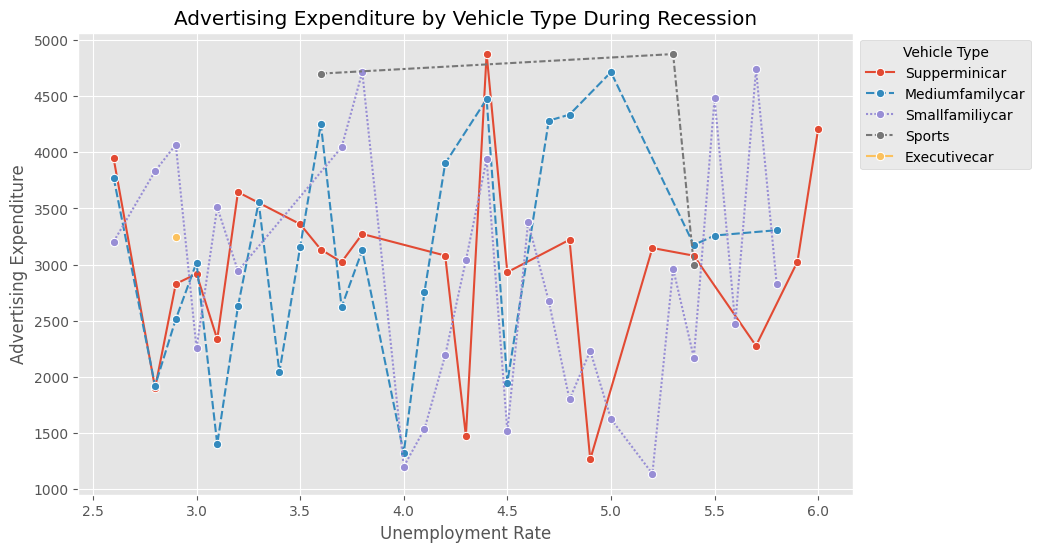

In [78]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_rec, x="unemployment_rate", y="Advertising_Expenditure",
              hue="Vehicle_Type", style="Vehicle_Type",
              errorbar=None, marker="o")
plt.title("Advertising Expenditure by Vehicle Type During Recession")
plt.ylabel("Advertising Expenditure")
plt.xlabel("Unemployment Rate")
plt.legend(title="Vehicle Type", bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

### TASK 1.10 Create a map on the hightest sales region/offices of the company during recession period

In [80]:
!curl -o us-states.json https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 92 87689   92 81467    0     0  63122      0  0:00:01  0:00:01 --:--:-- 63201
100 87689  100 87689    0     0  51274      0  0:00:01  0:00:01 --:--:-- 51310


In [86]:
filename = 'us-states.json'
map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)
sales_by_city = df_rec.groupby('City')['Automobile_Sales'].sum().reset_index()
choropleth = folium.Choropleth(
    geo_data=filename,
    data=sales_by_city, 
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Automobile Sales During Recession'
    ).add_to(map)
choropleth.geojson.add_child(
        folium.features.GeoJsonTooltip(['name'], labels=True)
    )
map